Introduction:
Birdwatching, and associated activities such as identifying birds, has been a common hobby fr centuries. In just February of this year, the world record for most birds having been seen across the world, 10 000 birds, was broken. A new bird species, the Cinnyris infrenatus, was found as recently as 2022 and there will never be a guarantee that humans have identified all bird species. If non-experts come across a bird which happens to be an unknown species, the only form of evidence may be a picture. From these pictures we would likely be able to identify dimensions such as the bird's wingspan, beak size and more. 
Thus, our question is:
Based on an unknown bird's dimentions, what family does the given bird belong to?

We will be using the AVONET database, compiled by Tobias et al. (2022). It is compiled in an excel sheet. We will primarily be focusing on page 2 of the excel sheet "AVONET1_BirdLife". This dataset describes more than 90 000 individual birds form over 11 000 species. The individuals are grouped into species and each observation includes the order and family of each species of bird as well as the average beak length, width and depth, wingspan, tarsus length, kipps distance, tail length and mass among all recorded individuals of the species. There is also location information in the form of the average coordinates at which the birds were found as well as the habitat in which they inhabited. 

Tobias, J. A., Sheard, C., Pigot, A. L., Devenish, A. J., Yang, J., Sayol, F., Neate‐Clegg, M. H., Alioravainen, N., Weeks, T. L., Barber, R. A., Walkden, P. A., MacGregor, H. E., Jones, S. E., Vincent, C., Phillips, A. G., Marples, N. M., Montaño‐Centellas, F. A., Leandro‐Silva, V., Claramunt, S., … Schleuning, M. (2022). Avonet: Morphological, ecological and geographical data for all birds. Ecology Letters, 25(3), 571–707. https://doi.org/10.1111/ele.13898 

In [8]:
library(repr)
library(tidyverse)
library(tidymodels)
library(readxl)
library(httr)

packageVersion("readxl")
# [1] ‘0.1.1’
url = "https://github.com/danizenarosa/dsci-100-grp43/raw/main/data/birds.xlsx"
GET(url, write_disk(tf <- tempfile(fileext = ".xlsx")))
birds_data <- read_excel(tf, 2)

birds_count <- select(birds_data, Family1, Total.individuals, Beak.Length_Culmen:Mass) |>
    group_by( Family1) |>
    summarize(count = sum(Total.individuals), across(Beak.Length_Culmen:Mass, mean)) |>
    arrange(count = desc(count)) |>
    slice(1:10)
birds_count

[1] ‘1.4.3’

Response [https://raw.githubusercontent.com/danizenarosa/dsci-100-grp43/main/data/birds.xlsx]
  Date: 2024-03-10 06:09
  Status: 200
  Content-Type: application/octet-stream
  Size: 21.5 MB
<ON DISK>  /tmp/Rtmp2g3o93/file23e28b46d13.xlsxNULL

Warning message:
“Expecting numeric in A4995 / R4995C1: got 'NA'”
Warning message:
“Expecting numeric in A5255 / R5255C1: got 'NA'”
Warning message:
“Expecting numeric in A5265 / R5265C1: got 'NA'”
Warning message:
“Expecting numeric in A5276 / R5276C1: got 'NA'”
Warning message:
“Expecting numeric in A6700 / R6700C1: got 'NA'”
Warning message:
“Expecting numeric in A6746 / R6746C1: got 'NA'”
Warning message:
“Expecting numeric in A7296 / R7296C1: got 'NA'”
Warning message:
“Expecting numeric in A7302 / R7302C1: got 'NA'”
Warning message:
“Expecting numeric in A7329 / R7329C1: got 'NA'”
Warning message:
“Expecting numeric in A7354 / R7354C1: got 'NA'”


Family1,count,Beak.Length_Culmen,Beak.Length_Nares,Beak.Width,Beak.Depth,Tarsus.Length,Wing.Length,Kipps.Distance,Secondary1,Hand-Wing.Index,Tail.Length,Mass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Thraupidae,4988,14.98162,9.151471,5.147059,6.517402,20.008088,73.55637,13.916176,59.51912,18.84118,59.21642,23.264240
Tyrannidae,4670,15.56258,9.114031,5.036748,4.019154,18.646771,71.56526,14.118040,57.40601,18.39532,61.27528,17.638731
Furnariidae,3878,22.19301,15.050760,3.935866,4.908511,22.293313,80.44681,13.644681,66.80365,16.38172,79.69544,30.622097
Trochilidae,3232,23.85738,18.869672,2.165574,2.053279,5.131148,57.00355,35.921038,20.89918,63.43224,40.48607,5.136995
Muscicapidae,2927,16.52776,9.501493,4.050448,4.124478,23.618209,81.11552,15.688657,65.33761,19.14179,64.11015,24.417015
Thamnophilidae,2868,18.38388,10.777273,4.492149,4.857851,22.309917,63.35909,6.833884,57.16033,10.83967,52.60868,20.520620
Psittacidae,2212,25.13895,20.775263,12.623421,21.402632,16.787895,152.61053,60.650789,91.83684,40.39026,114.55868,166.488474
Columbidae,2197,22.42493,11.301133,4.667422,5.226912,27.532295,169.17167,53.297167,115.84533,31.12011,112.45552,257.899122
Pycnonotidae,2003,19.73671,11.323418,4.498101,5.304430,19.901266,91.59810,14.243038,77.30633,15.30506,85.13608,35.827025


It can be seen that the averages of the dimension of bird families differ enough to be used as identification.

[1] "Thraupidae"     "Tyrannidae"     "Furnariidae"    "Trochilidae"   
 [5] "Muscicapidae"   "Thamnophilidae" "Psittacidae"    "Columbidae"    
 [9] "Pycnonotidae"   "Parulidae"

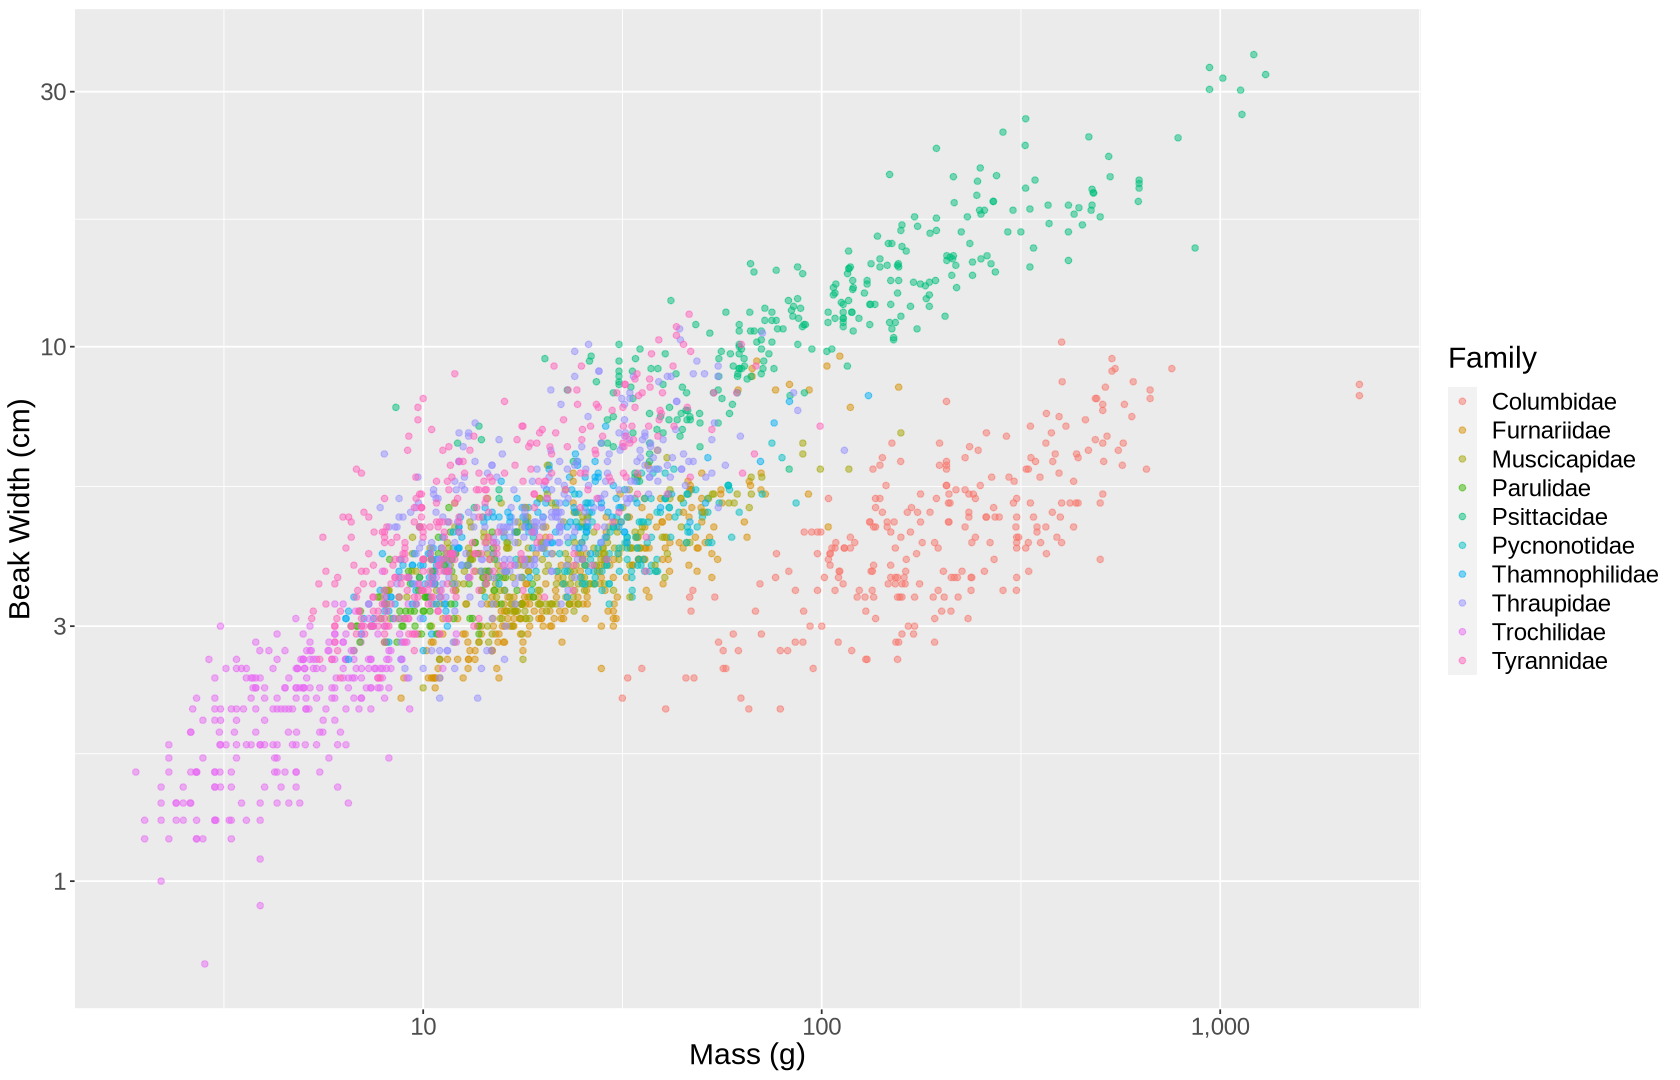

In [15]:
set.seed(1)
options(repr.plot.height = 9, repr.plot.width = 14)

birds_top_10 <- birds_count |>
    pull(Family1)
birds_top_10

birds_data_pruned <- filter(birds_data, Family1 %in% birds_top_10)

split_birds <- initial_split(birds_data_pruned, prop = 0.75, strata = Family1)
training_birds <- training(split_birds)
test_birds <- testing(split_birds)

ggplot(training_birds, aes(x = Mass, y = Beak.Width, color = Family1)) +
    geom_point(alpha = .5) +
    labs(x = "Mass (g)", y = "Beak Width (cm)", color= "Family") +
    scale_x_log10(labels = label_comma()) +
    scale_y_log10(labels = label_comma()) +
    theme(text = element_text(size = 18))


Using the mass and beak width of the 10 most populous birds in out dataset, there is evidence of distinct groups although the center of the graph is noisy. Using other variables, we hope to distinguish each bird family enough to build a predictive model using classification

Methods:

Expected outcomes and significance:
We expect to find a strong correlation between bird dimensions and their family, even across different species. Should the dimensions themselves not have strong correlation with their families, we expect the ratios of these dimensions should also show a strong relationship between species of the same family. From this we will be able to predict the family of unknown birds based only on their dimensions. 

If non-experts come across new bird species, it could be vital to be able to identify the bird's close biological relatives (i.e the bird's family on the tree of life) for scientists to identify important biological traits without being present to study them. As mentioned above, it is likely evidence will only be able to exist in the form of an image and so more specific behavioural data may not be able to be taken. 

If our hypothesis is proven, then it could lead to questions about how or why certain species, despite living on opposite sides of the world, develop similar features.